## Univariate Timeseries Classification

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

filename = os.path.join("data", "arrowhead", "ArrowHead.txt")
data = pd.read_csv(filename, sep='  ', header=None, engine="python")

X_orig = data.iloc[:, 1:]
y = pd.get_dummies(data.iloc[:, 0].astype('int'))

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_orig, y)

X_train_orig.shape

(27, 251)

In [2]:
from pyreal.transformers import DimensionAdder

formatter = DimensionAdder()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
from sklearn.neural_network  import MLPClassifier

model = MLPClassifier(solver='sgd', alpha=.001, learning_rate_init=.01,
                             hidden_layer_sizes=(10, 10, 10), random_state=1)

model.fit(X_train_orig, y_train)


0.8518518518518519
0.8888888888888888


In [4]:
import pyreal.explainers.time_series.saliency.univariate_occlusion_saliency as oi
import numpy as np

explainer = oi.UnivariateOcclusionSaliency(model, X_train_orig, width=15, k=0, classes=[1, 2, 3])
explainer.fit()

signal1 = X_train_orig.iloc[0]
signal2 = X_train_orig.iloc[5]

pred1 = np.argmax(explainer.model_predict(signal1))
pred2 = np.argmax(explainer.model_predict(signal2))

print(pred1, pred2)

explanation1 = explainer.produce(signal1)
explanation2 = explainer.produce(signal2)

0 0


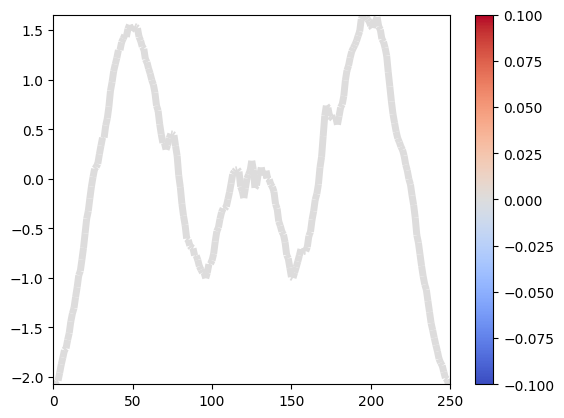

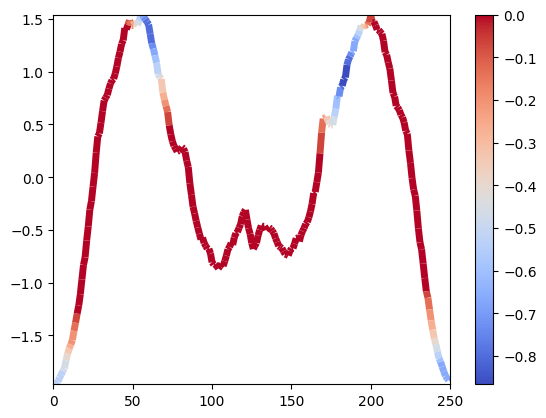

In [5]:
import pyreal.visualize as vis

vis.plot_timeseries_saliency(signal1, explanation1.get().iloc[pred1, :])
vis.plot_timeseries_saliency(signal2, explanation2.get().iloc[pred2, :])
